# <font color="#8333ff">Detect hand-written digits with logistic regression and explore gradient descent

Dans ce Brief, nous allons appliquer le principe de la régression logistique sur un cas d'étude portant sur la classification d'images (Digits), comparer les performances de différents algorithmes de classifications et investiguer le principe de déscente de gradiant, sa convergence...

## Description

Mr Pontier is back and needs your help. This times, he needs to automatically detect hand-written digits written on pictures that represents the phone numbers of his clients and collaborators.
Because he has thousands of documents, this will take far too long to do it manually. This is why he asked you if you can design an algorithm that automatically detect the number from the pictures.

Furthermore, Mr Pontier wants
* to understand how the algorithm works,
* to compare the performance with several classification algorithms 
* to observe the convergence of a grandient descent algorithm for further investigation.

In [1]:
# Import some libraries

import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 

## 1. Show and anderstand the datas

In [2]:
# Import some data
digits = load_digits()
# Show dimensionality
print(digits.data.shape)

(1797, 64)


In [3]:
## Description du fichier
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
digits.feature_names[:5]

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4']

In [5]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<Figure size 432x288 with 0 Axes>

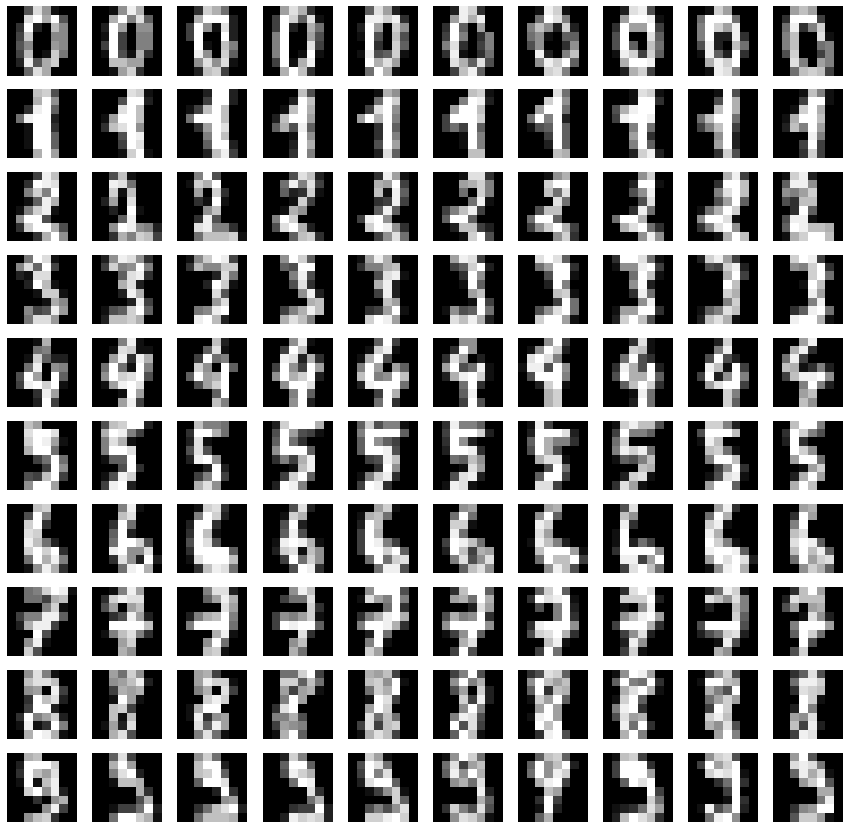

In [6]:
# Show several data for each label (== category) 

X = digits.images
Y = digits.target

n_digits = np.unique(Y)
M = 10
dim = int(np.sqrt(X.shape[1]))
plt.gray()
fig, axs = plt.subplots(len(n_digits), M, figsize=(15, 15))

for i, d in enumerate(n_digits):
    for j in range(M): ## avantage range ne crée pas la liste mais juste l'element au moment ou on en a besoin
                       ## donc gain mémoire
        axs[i,j].imshow(X[Y == d][j]) ## broadcast : Y == d renvoi une liste de True False ou les valeurs sont à 
                                      ## True à chaque fois que la condition est remplie. Et X[Y == d] est une 
                                      ## sous liste de X evec que les éléments qui vérifie la condition
        axs[i,j].axis('off')

In [7]:
X[Y == 3][1] # récupère le 1er élément de X correspondant à une image 3

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

In [8]:
# np.linspace? # ? permet d'ouvrir la doc

In [9]:
# Print montrant qu'il y a 1797 images dans le set (images de 8*8 pixels donc 64 pixels au total)
print("Image Data Shape" , digits.data.shape)

# Print montrant qu'il y a 1797 labels d'images (c'est un int de 0 à 9)
print("Label Data Shape", digits.target.shape, "of type", digits.target.dtype)
print("Possible value of Label : ", [each for each in np.unique(digits.target.ravel())])


Image Data Shape (1797, 64)
Label Data Shape (1797,) of type int64
Possible value of Label :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [10]:
np.unique(digits.data.ravel())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16.])

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63.]
[[ 0.  1.  2.  3.  4.  5.  6.  7.]
 [ 8.  9. 10. 11. 12. 13. 14. 15.]
 [16. 17. 18. 19. 20. 21. 22. 23.]
 [24. 25. 26. 27. 28. 29. 30. 31.]
 [32. 33. 34. 35. 36. 37. 38. 39.]
 [40. 41. 42. 43. 44. 45. 46. 47.]
 [48. 49. 50. 51. 52. 53. 54. 55.]
 [56. 57. 58. 59. 60. 61. 62. 63.]]


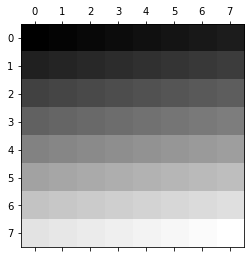

In [11]:
taille = int(64)
a = np.linspace(0, taille-1, num=taille)
print(a)
a = a.reshape(int(np.sqrt(taille)),int(np.sqrt(taille)))
print(a)
plt.matshow(a) 

In [12]:
# Type de valeur
digits.data.dtype

dtype('float64')

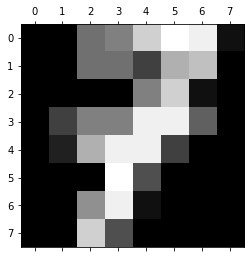

In [13]:
# Show one data 
num = 7
plt.matshow(digits.images[num]) 
plt.show() 

In [14]:
digits.images[num]

array([[ 0.,  0.,  7.,  8., 13., 16., 15.,  1.],
       [ 0.,  0.,  7.,  7.,  4., 11., 12.,  0.],
       [ 0.,  0.,  0.,  0.,  8., 13.,  1.,  0.],
       [ 0.,  4.,  8.,  8., 15., 15.,  6.,  0.],
       [ 0.,  2., 11., 15., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 15.,  1.,  0.,  0.,  0.],
       [ 0.,  0., 13.,  5.,  0.,  0.,  0.,  0.]])

In [15]:
digits.target[num]

7

In [16]:
digits.images.max()

16.0

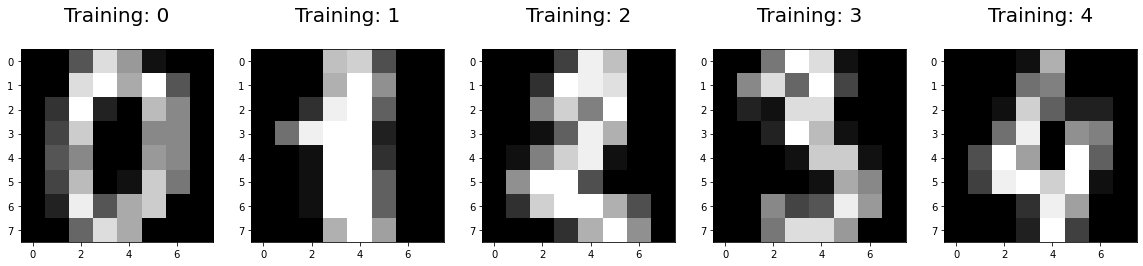

In [17]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

**Apprentissage sur les données :**
* 1797 images (représentant des chiffre) sont présentes dans ce set et la valeur du chiffre correspondant (label)
* Les images étant labélisée, le problème posé est un problème de classification supervisée (supervisée car chaque image est labélisée)
* Une image est composée de 8*8 = 64 pixels
* Chaque pixel à une valeur comprise entre 0 à 16
* Un label d'image est une valeur de chiffre (int de 0 à 9)

## 2) Prepare your ML algorithm
### How to evaluate classification algorithms ?
Veille : 
* https://scikit-learn.org
Pour effectuer une classification supervisée, sklearn propose plusieurs types d'algo (liste non exhaustive) :
    * Regression logistic
    * Support Vector Machines
    * Stochastic Gradient Descent
    * Nearest Neighbors
    * Gaussian Processes
    * Decision Trees
    * ...
* wikipedia
* towards data science
* ...

* Questions :

    1. Write the equation of the precision and recall score and explicit what each terms represents.
    2. explain the purpose of the training set ?
    3. explain the prpose of the testing set ?


### What does the train_test_split function in sklearn do ?

![image1](./img/img1.png)

![image](./img/compromis_biais_variance.png)

### Splitting Data into Training and Test Sets (Digits Dataset)

Veille : ...

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

## Vérif test set size
ndata = digits.data.shape
#print(ndata[0])
ntrain = xtrain.shape
print(ntrain[0])
ntest = xtest.shape
print(ntest[0])

print("The testing set is about {} % of the set values.".format(round((ntest[0]/ndata[0])*100)))
print('The ratio is as it defined in the ``train_test_split`` fonction.')

1437
360
The testing set is about 20 % of the set values.
The ratio is as it defined in the ``train_test_split`` fonction.


## 3) Predict Digits

**In the dataset we have multiple label. Therefore, to start we will predict in a binary case. It means that that we will predict only if an image is a given digit (for exemple `7`).**

To do that we will a **logistic regression** algorithm plus (at least) **two** others of your choices.

Fit the model and show the performance results whithin a table for each models in terms of:
* the **precision** score on the testing set 
* the **recall** score on the testing set
* the inference time for each algorithm

**Precision**

In the field of information retrieval, precision is the fraction of retrieved documents that are relevant to the query:

![image](./img/img2.svg)

For example, for a text search on a set of documents, precision is the number of correct results divided by the number of all returned results.

Precision takes all retrieved documents into account, but it can also be evaluated at a given cut-off rank, considering only the topmost results returned by the system. This measure is called precision at n or P@n.

Precision is used with recall, the percent of all relevant documents that is returned by the search. The two measures are sometimes used together in the F1 Score (or f-measure) to provide a single measurement for a system.

Note that the meaning and usage of "precision" in the field of information retrieval differs from the definition of accuracy and precision within other branches of science and technology.

**Recall**

In information retrieval, recall is the fraction of the relevant documents that are successfully retrieved.

![image](./img/img3.svg)

For example, for a text search on a set of documents, recall is the number of correct results divided by the number of results that should have been returned.

In binary classification, recall is called sensitivity. It can be viewed as the probability that a relevant document is retrieved by the query.

It is trivial to achieve recall of 100% by returning all documents in response to any query. Therefore, recall alone is not enough but one needs to measure the number of non-relevant documents also, for example by also computing the precision. 

![precision_recall](./img/prec_recall.png)

### 3.1 Modification des données
Une sortie y par chiffre, pour pouvoir fit un modèle particulier sur un chiffre donné

In [19]:
ytrain0 = np.array([1 if ytrain[i]==0 else 0 for i in range(len(ytrain))])
ytrain1 = np.array([1 if ytrain[i]==1 else 0 for i in range(len(ytrain))])
ytrain2 = np.array([1 if ytrain[i]==2 else 0 for i in range(len(ytrain))])
ytrain3 = np.array([1 if ytrain[i]==3 else 0 for i in range(len(ytrain))])
ytrain4 = np.array([1 if ytrain[i]==4 else 0 for i in range(len(ytrain))])
ytrain5 = np.array([1 if ytrain[i]==5 else 0 for i in range(len(ytrain))])
ytrain6 = np.array([1 if ytrain[i]==6 else 0 for i in range(len(ytrain))])
ytrain7 = np.array([1 if ytrain[i]==7 else 0 for i in range(len(ytrain))])
ytrain8 = np.array([1 if ytrain[i]==8 else 0 for i in range(len(ytrain))])
ytrain9 = np.array([1 if ytrain[i]==9 else 0 for i in range(len(ytrain))])

t = 35

#print(ytrain[:t])
#print(ytrain0[:t])
#print(ytrain[:t])
#print(ytrain1[:t])
#print(ytrain[:t])
#print(ytrain2[:t])
#print(ytrain[:t])
#print(ytrain3[:t])
#print(ytrain[:t])
#print(ytrain4[:t])
#print(ytrain[:t])
#print(ytrain5[:t])
#print(ytrain[:t])
#print(ytrain6[:t])
#print(ytrain[:t])
#print(ytrain7[:t])
#print(ytrain[:t])
#print(ytrain8[:t])
#print(ytrain[:t])
#print(ytrain9[:t])

ytest0 = np.array([1 if ytest[i]==0 else 0 for i in range(len(ytest))])
ytest1 = np.array([1 if ytest[i]==1 else 0 for i in range(len(ytest))])
ytest2 = np.array([1 if ytest[i]==2 else 0 for i in range(len(ytest))])
ytest3 = np.array([1 if ytest[i]==3 else 0 for i in range(len(ytest))])
ytest4 = np.array([1 if ytest[i]==4 else 0 for i in range(len(ytest))])
ytest5 = np.array([1 if ytest[i]==5 else 0 for i in range(len(ytest))])
ytest6 = np.array([1 if ytest[i]==6 else 0 for i in range(len(ytest))])
ytest7 = np.array([1 if ytest[i]==7 else 0 for i in range(len(ytest))])
ytest8 = np.array([1 if ytest[i]==8 else 0 for i in range(len(ytest))])
ytest9 = np.array([1 if ytest[i]==9 else 0 for i in range(len(ytest))])

#print(ytest[:t])
#print(ytest0[:t])
#print(ytest[:t])
#print(ytest1[:t])
#print(ytest[:t])
#print(ytest2[:t])
#print(ytest[:t])
#print(ytest3[:t])
#print(ytest[:t])
#print(ytest4[:t])
#print(ytest[:t])
#print(ytest5[:t])
#print(ytest[:t])
#print(ytest6[:t])
#print(ytest[:t])
#print(ytest7[:t])
#print(ytest[:t])
#print(ytest8[:t])
#print(ytest[:t])
#print(ytest9[:t])



### 3.2 Modèle en triant les données Avec les datas pour les 0

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

LogReg0 = LogisticRegression(max_iter = 2000)
%timeit LogReg0.fit(xtrain,ytrain0)
LogReg0.fit(xtrain,ytrain0)

# Make predictions on entire test data
ypred0 = LogReg0.predict(xtest)
print(ytest[:t])
print(ypred0[:t]) # permet en effet de prédire les 0
print("La précision obtenue est de {} %".format(round(precision_score(list(ytest0), list(ypred0), 
                                                                     average = "macro"),3)*100))
print("Le recall obtenue est de {} %".format(round(recall_score(list(ytest0), list(ypred0), 
                                                               average = "macro"),3)*100))
print(classification_report(ytest0, ypred0))

71.8 ms ± 13.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
La précision obtenue est de 96.6 %
Le recall obtenue est de 99.7 %
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       333
           1       0.93      1.00      0.96        27

    accuracy                           0.99       360
   macro avg       0.97      1.00      0.98       360
weighted avg       0.99      0.99      0.99       360



### 3.3 Fit d'un modèle par type d'image :  1, 2, 3  etc....
L'idée est de Fit un modèle permettant de classifier les 0, un pour classifier les 1 etc...

In [21]:
LogReg1 = LogisticRegression(max_iter = 2000)
LogReg1.fit(xtrain,ytrain1)
LogReg2 = LogisticRegression(max_iter = 2000)
LogReg2.fit(xtrain,ytrain2)
LogReg3 = LogisticRegression(max_iter = 2000)
LogReg3.fit(xtrain,ytrain3)
LogReg4 = LogisticRegression(max_iter = 2000)
LogReg4.fit(xtrain,ytrain4)
LogReg5 = LogisticRegression(max_iter = 2000)
LogReg5.fit(xtrain,ytrain5)
LogReg6 = LogisticRegression(max_iter = 2000)
LogReg6.fit(xtrain,ytrain6)
LogReg7 = LogisticRegression(max_iter = 2000)
LogReg7.fit(xtrain,ytrain7)
LogReg8 = LogisticRegression(max_iter = 2000)
LogReg8.fit(xtrain,ytrain8)
LogReg9 = LogisticRegression(max_iter = 2000)
LogReg9.fit(xtrain,ytrain9)

LogisticRegression(max_iter=2000)

In [22]:
t = 35
# Make predictions on entire test data
ypred1 = LogReg1.predict(xtest)
print(ytest[:t])
print(ypred1[:t]) # permet en effet de prédire les 1
print("La précision obtenue est de {} %".format(round(precision_score(list(ytest1), list(ypred1), average = 'macro'),3)*100))
print("Le recall obtenue est de {} %".format(round(recall_score(ytest1, ypred1, average = 'macro'),3)*100))
print(classification_report(ytest1, ypred1))
print("-------------------------------------------------------------------")

ypred2 = LogReg2.predict(xtest)
print(ytest[:t])
print(ypred2[:t]) # permet en effet de prédire les 2
print("La précision obtenue est de {} %".format(round(precision_score(list(ytest2), list(ypred2), average = 'macro'),3)*100))
print("Le recall obtenue est de {} %".format(round(recall_score(ytest2, ypred2, average = 'macro'),3)*100))
print(classification_report(ytest2, ypred2))
print("-------------------------------------------------------------------")

ypred3 = LogReg3.predict(xtest)
print(ytest[:t])
print(ypred3[:t]) # permet en effet de prédire les 3
print("La précision obtenue est de {} %".format(round(precision_score(list(ytest3), list(ypred3), average = 'macro'),3)*100))
print("Le recall obtenue est de {} %".format(round(recall_score(ytest3, ypred3, average = 'macro'),3)*100))
print(classification_report(ytest3, ypred3))
print("-------------------------------------------------------------------")

ypred4 = LogReg4.predict(xtest)
print(ytest[:t])
print(ypred4[:t]) # permet en effet de prédire les 4
print("La précision obtenue est de {} %".format(round(precision_score(list(ytest4), list(ypred4), average = 'macro'),3)*100))
print("Le recall obtenue est de {} %".format(round(recall_score(ytest4, ypred4, average = 'macro'),3)*100))
print(classification_report(ytest4, ypred4))
print("-------------------------------------------------------------------")

ypred5 = LogReg5.predict(xtest)
print(ytest[:t])
print(ypred5[:t]) # permet en effet de prédire les 5
print("La précision obtenue est de {} %".format(round(precision_score(list(ytest5), list(ypred5), average = 'macro'),3)*100))
print("Le recall obtenue est de {} %".format(round(recall_score(ytest5, ypred5, average = 'macro'),3)*100))
print(classification_report(ytest5, ypred5))
print("-------------------------------------------------------------------")

ypred6 = LogReg6.predict(xtest)
print(ytest[:t])
print(ypred6[:t]) # permet en effet de prédire les 6
print("La précision obtenue est de {} %".format(round(precision_score(list(ytest6), list(ypred6), average = 'macro'),3)*100))
print("Le recall obtenue est de {} %".format(round(recall_score(ytest6, ypred6, average = 'macro'),3)*100))
print(classification_report(ytest6, ypred6))
print("-------------------------------------------------------------------")

ypred7 = LogReg7.predict(xtest)
print(ytest[:t])
print(ypred7[:t]) # permet en effet de prédire les 7
print("La précision obtenue est de {} %".format(round(precision_score(list(ytest7), list(ypred7), average = 'macro'),3)*100))
print("Le recall obtenue est de {} %".format(round(recall_score(ytest7, ypred7, average = 'macro'),3)*100))
print(classification_report(ytest7, ypred7))
print("-------------------------------------------------------------------")

ypred8 = LogReg8.predict(xtest)
print(ytest[:t])
print(ypred8[:t]) # permet en effet de prédire les 8
print("La précision obtenue est de {} %".format(round(precision_score(list(ytest8), list(ypred8), average = 'macro'),3)*100))
print("Le recall obtenue est de {} %".format(round(recall_score(ytest8, ypred8, average = 'macro'),3)*100))
print(classification_report(ytest8, ypred8))
print("-------------------------------------------------------------------")

ypred9 = LogReg9.predict(xtest)
print(ytest[:t])
print(ypred9[:t]) # permet en effet de prédire les 9
print("La précision obtenue est de {} %".format(round(precision_score(list(ytest9), list(ypred9), average = 'macro'),3)*100))
print("Le recall obtenue est de {} %".format(round(recall_score(ytest9, ypred9, average = 'macro'),3)*100))
print(classification_report(ytest9, ypred9))
print("-------------------------------------------------------------------")


[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
La précision obtenue est de 92.7 %
Le recall obtenue est de 89.4 %
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       325
           1       0.88      0.80      0.84        35

    accuracy                           0.97       360
   macro avg       0.93      0.89      0.91       360
weighted avg       0.97      0.97      0.97       360

-------------------------------------------------------------------
[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9]
[1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
La précision obtenue est de 100.0 %
Le recall obtenue est de 100.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       324
           1       1.00      1.00      1.00        36

    accuracy     

Beaucoup de différence entre les precision et recall (pour les 0 ou les 1) => le jeux n'est pas bien balancé il faudrait mettre des poids par classe avec class_weight

### 3.4 Comparaison avec d'autres modèles (SVM, KNN etc...)

#### 3.4.1 SVM

In [23]:
from sklearn import svm
SVM8 = svm.SVC()

## Fit + predict
SVM8.fit(xtrain, ytrain8)
ypredSVM8 = SVM8.predict(xtest)

#### 3.4.2 KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

## Choix du nombre de voisins
Nneighbors=3
neigh8 = KNeighborsClassifier(n_neighbors=Nneighbors)

neigh8.fit(xtrain, ytrain8)
ypredKNN8 = neigh8.predict(xtest)

#### 3.4.3 SGD (Stochastic Gradient Descent)

In [25]:
from sklearn.linear_model import SGDClassifier

sgd8 = SGDClassifier()
sgd8.fit(xtrain, ytrain8)
ypredSGD8 = sgd8.predict(xtest)

#### 3.4.3 DTC (Decision Tree Classifier)

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc8 = DecisionTreeClassifier()
dtc8.fit(xtrain, ytrain8)
ypredDTC8 = dtc8.predict(xtest)

#### 3.4.5 Evaluation

In [27]:
print('---------------------Reg Log-------------------------')
print(classification_report(ytest8, ypred8))
print('-----------------------SVM---------------------------')
print(classification_report(ytest8, ypredSVM8))
print('-----------------------KNN---------------------------')
print(classification_report(ytest8, ypredKNN8))
print('-----------------------SGD---------------------------')
print(classification_report(ytest8, ypredSGD8))
print('-----------------------DTC---------------------------')
print(classification_report(ytest8, ypredDTC8))

---------------------Reg Log-------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       321
           1       0.86      0.77      0.81        39

    accuracy                           0.96       360
   macro avg       0.91      0.88      0.89       360
weighted avg       0.96      0.96      0.96       360

-----------------------SVM---------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       321
           1       1.00      0.92      0.96        39

    accuracy                           0.99       360
   macro avg       1.00      0.96      0.98       360
weighted avg       0.99      0.99      0.99       360

-----------------------KNN---------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       321
           1       1.00      0.95      0.97        39

    accuracy        

Dans cette analyse on remarque que les aldo les moins performants sont la regression Logistique et l'arbre de decision (mais c'est pour ce cas particulier donc aucune conclusion hâtive ! )

## 4. Multi-class classification

### 4.1 En utilisant directement 1 modèle sklearn.linear_model.LogisticRegression
#### Création du modèle (choix du modèle +fit)

In [28]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(max_iter = 2000, solver='liblinear')

# Fit des données
%timeit LogReg.fit(xtrain,ytrain)
LogReg.fit(xtrain,ytrain)


209 ms ± 11.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


LogisticRegression(max_iter=2000, solver='liblinear')

#### Prédictions

In [29]:
# Predict for Multiple Observations (images) at Once
LogReg.predict(xtest[0:10])

# Make predictions on entire test data
ypred = LogReg.predict(xtest)

#### Evaluation

The recall is the ratio tp / (tp + fn)

In [30]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Use score method to get accuracy of model
score = LogReg.score(xtest, ytest)

prec = round(precision_score(list(ytest), list(ypred), average = 'macro'),3)*100
recall = round(recall_score(ytest, ypred, average = 'macro'),3)*100

print("")
print("La précision obtenue est de {} %".format(prec))
print("Le recall obtenue est de {} %".format(recall))
print(classification_report(ytest, ypred))


La précision obtenue est de 95.1 %
Le recall obtenue est de 95.3 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.89      0.89      0.89        35
           2       0.97      0.94      0.96        36
           3       0.91      1.00      0.95        29
           4       0.97      1.00      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       1.00      0.95      0.97        39
           8       0.88      0.90      0.89        39
           9       0.95      0.90      0.92        41

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



On remarque par exemple ici que la precision et accuracy sont bien meilleurs

#### Confusion Matrix 

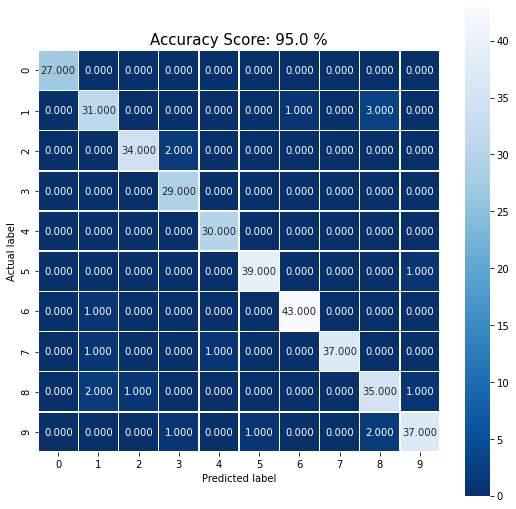

In [31]:
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(ytest, ypred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0} %'.format(round(score,3)*100)
plt.title(all_sample_title, size = 15);
#plt.show();

**Etudions les critères d'évaluation du modèle de regression logistique**

On parle de :
* vrais positifs (VP): individus qui ont été classés positifs et qui le sont réellement;
* faux positifs (FP): classés positifs alors qu’ils sont négatifs;
* vrai négatifs (VN): individus qui ont été classés négatifs et qui le sont réellement;
* faux négatifs (FN): classés négatifs alors qu’ils sont positifs.<br>


**Les critères :**

* Taux d’erreur : nombre de mauvais classement rapporté à l’effectif total 
* Taux de succès : probabilité de bon classement du modèle (accuracy)
* Sensibilité (ou taux de vrai positif) : capacité du modèle à retrouver les positifs (rappel pour le 1)
* Précision : proportion de vrais positifs parmi les individus classés positifs (précision pour le 1)
* Spécificité (ou taux de vrai négatif) : proportion de négatifs détectés (rappel pour le 0)
* Le taux de faux positifs (TFP) : proportion de négatifs qui ont été classés positifs (précision pour le 0)


#### Display Misclassified images with Predicted Labels

In [32]:
index = 0
misclassifiedIndex = []
for predict, actual in zip(ypred, ytest):
    if predict != actual: 
        misclassifiedIndex.append(index)
    index +=1

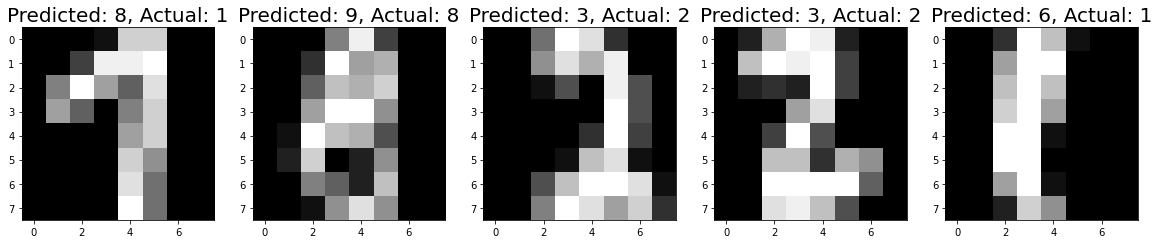

In [33]:
plt.figure(figsize=(20,4))
for plotIndex, wrong in enumerate(misclassifiedIndex[10:15]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(xtest[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(ypred[wrong], ytest[wrong]), fontsize = 20)

### 4.2. En utilisant nos 10 modèle

Je voulais combiner les 10 modèles individuel afin de predire en multiclasse :
* Le principe est, pour une image donner, prédire avec les 10 modèles et celui obtenant une probabilité max est le bon
* Par manque de temps, je n'ai pas pu le faire...

### 4.3 Comparaison avec d'autre modèles du package sklearn
#### 4.3.1 SVM

In [34]:

SVM = svm.SVC()

## Fit + predict
%timeit SVM.fit(xtrain, ytrain)
SVM.fit(xtrain, ytrain)

ypredSVM = SVM.predict(xtest)

80.7 ms ± 2.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### 4.3.2 KNN

In [35]:
## Choix du nombre de voisins
Nneighbors=3
neigh = KNeighborsClassifier(n_neighbors=Nneighbors)

%timeit neigh.fit(xtrain, ytrain)
neigh.fit(xtrain, ytrain)
ypredKNN = neigh.predict(xtest)

7.2 ms ± 359 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### 4.3.3 SGD (Stochastic Gradient Descent)

In [36]:
sgd = SGDClassifier()

%timeit sgd.fit(xtrain, ytrain)
sgd.fit(xtrain, ytrain)
ypredSGD = sgd.predict(xtest)

59.9 ms ± 2.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### 4.3.4 DTC (Decision Tree Classifier)

In [37]:
dtc = DecisionTreeClassifier()
%timeit dtc.fit(xtrain, ytrain)
dtc.fit(xtrain, ytrain)
ypredDTC = dtc.predict(xtest)

17 ms ± 192 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### 4.3.5 Evaluation / Comparaison

In [38]:
print('---------------------Reg Log-------------------------')
print(classification_report(ytest, ypred))
print('-----------------------SVM---------------------------')
print(classification_report(ytest, ypredSVM))
print('-----------------------KNN---------------------------')
print(classification_report(ytest, ypredKNN))
print('-----------------------SGD---------------------------')
print(classification_report(ytest, ypredSGD))
print('-----------------------DTC---------------------------')
print(classification_report(ytest, ypredDTC))

---------------------Reg Log-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.89      0.89      0.89        35
           2       0.97      0.94      0.96        36
           3       0.91      1.00      0.95        29
           4       0.97      1.00      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       1.00      0.95      0.97        39
           8       0.88      0.90      0.89        39
           9       0.95      0.90      0.92        41

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360

-----------------------SVM---------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.97 

In [39]:
target_names = ['img_0', 'img_1', 'img_2', 'img_3', 'img_4', 'img_5','img_6', 'img_7', 'img_8', 'img_9']

report = classification_report(ytest, ypred, target_names=target_names, output_dict=True)
print(classification_report(ytest, ypred, target_names=target_names))

              precision    recall  f1-score   support

       img_0       1.00      1.00      1.00        27
       img_1       0.89      0.89      0.89        35
       img_2       0.97      0.94      0.96        36
       img_3       0.91      1.00      0.95        29
       img_4       0.97      1.00      0.98        30
       img_5       0.97      0.97      0.97        40
       img_6       0.98      0.98      0.98        44
       img_7       1.00      0.95      0.97        39
       img_8       0.88      0.90      0.89        39
       img_9       0.95      0.90      0.92        41

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



In [40]:
report = classification_report(ytest, ypred, target_names=target_names, output_dict=True)
#print(report['accuracy']['f1-score'])
print(report['macro avg']['precision'])
print(report['macro avg']['recall'])

0.9507125468617404
0.9531024327975548


Dans le cas multiclass en terme de performances les deux grand gagnant sont KNN et SVM. Et l'algo qui voit ses performances se dégrader et fini derner est l'arbre de Décision.

En ce qui concerne le temps d'execution, le plus rapide est le KNN et le plus lent la régréssion logistique 

### 4.4. Cross Validation
Ici l'objectif est de faire varier la taille des training et testing set sur plusieurs types de modèles afin d'en evaluer l'impacte.


In [ ]:
import time
import pandas as pd


# prepare models
models = [['LR', LogisticRegression(max_iter = 2000, solver='liblinear')], 
          ['KNN', KNeighborsClassifier()],
          ['SVM', svm.SVC()], 
          ['SGD', SGDClassifier()],
          ['DTC', DecisionTreeClassifier()]
         ]

# infos pour le dataFrame

columns=['score_train', 'Precision_train', 'Recall_train', 
         'score_test', 'Precision_test', 'Recall_test',
         'time']
results = []
index =[]


xtrain, xtest, ytrain, ytest = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

# evaluate each model in turn
for name, model in models:
    tps1 = time.time()
    model.fit(xtrain, ytrain)
    ypred_test = model.predict(xtest)
    ypred_train = model.predict(xtrain)

    # evaluation du modèle
    score_test = LogReg.score(xtest, ytest)
    report_test = classification_report(ytest, ypred_test, target_names=target_names, output_dict=True)
    score_train = LogReg.score(xtrain, ytrain)
    report_train = classification_report(ytrain, ypred_train, target_names=target_names, output_dict=True)
    #print(report['macro avg']['precision'])
    #print(report['macro avg']['recall'])

    tps2 = time.time()
    tps = tps2 - tps1
    index.append(name)
    results.append([score_train, report_train['macro avg']['precision'], report_train['macro avg']['recall'],
                         score_test, report_test['macro avg']['precision'], report_test['macro avg']['recall'],
                         tps])
results_df = pd.DataFrame(results, index = index, columns=columns)


results_df
    

In [58]:
import time
import pandas as pd


# prepare models
models = [['LR', LogisticRegression(max_iter = 2000, solver='liblinear')], 
#          ['KNN', KNeighborsClassifier()],
#          ['SVM', svm.SVC()], 
#          ['SGD', SGDClassifier()],
#          ['DTC', DecisionTreeClassifier()]
         ]

# infos pour le dataFrame

columns=['score_train', 'Precision_train', 'Recall_train', 
         'score_test', 'Precision_test', 'Recall_test',
         'time']
results = []
index =[]


test_size = [0.025, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5,
             0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.972]
nb =len(test_size)
for i in range(nb):
    xtrain, xtest, ytrain, ytest = train_test_split(digits.data, digits.target, test_size=test_size[i], random_state=0)

    # evaluate each model in turn
    for name, model in models:
        tps1 = time.time()
        model.fit(xtrain, ytrain)
        ypred_test = model.predict(xtest)
        ypred_train = model.predict(xtrain)

        # evaluation du modèle
        score_test = LogReg.score(xtest, ytest)
        report_test = classification_report(ytest, ypred_test, target_names=target_names, output_dict=True)
        score_train = LogReg.score(xtrain, ytrain)
        report_train = classification_report(ytrain, ypred_train, target_names=target_names, output_dict=True)
        #print(report['macro avg']['precision'])
        #print(report['macro avg']['recall'])

        tps2 = time.time()
        tps = tps2 - tps1
        index.append(name)
        results.append([score_train, report_train['macro avg']['precision'], report_train['macro avg']['recall'],
                             score_test, report_test['macro avg']['precision'], report_test['macro avg']['recall'],
                             tps])
        
    results_df = pd.DataFrame(results, index = index, columns=columns)
    results_df


results_df
    

,score_train,Precision_train,Recall_train,score_test,Precision_test,Recall_test,time
LR,0.992580,0.993708,0.993554,1.000000,0.988889,0.980000,0.425966
LR,0.993556,0.992948,0.992858,0.977778,0.966623,0.959957,0.321469
LR,0.995671,0.993238,0.992869,0.966667,0.959830,0.963557,0.282973
LR,0.997380,0.994103,0.993929,0.966667,0.945685,0.948988,0.308616
LR,1.000000,0.995832,0.995680,0.963889,0.950713,0.953102,0.276293
LR,1.000000,0.996155,0.996157,0.971111,0.954348,0.954302,0.268975
LR,1.000000,0.997426,0.997489,0.975926,0.953687,0.953295,0.229500
LR,1.000000,0.998248,0.998305,0.979332,0.945448,0.944518,0.212194
LR,1.000000,0.997959,0.998113,0.981919,0.950685,0.949495,0.190533
LR,1.000000,0.998889,0.999010,0.983931,0.956118,0.954922,0.176502


Les performances de la regression logistique rest supérieur à 90% jusqu'a 95 % du set pour le test.
Autrement dit avec uniquement 5% des données pour le test (90 images) la precission et le rappel sont à 90%

## 5. Gradient descent 

We want to observe the convergence of the performance.
To do so, we want to implement our own version of the Logistic regression inference algorithm.

> veille
What algorithm uses sklearn to estimate the model parameters for the logistic regression ?
* What are the keys equations who need to implement the algorithm ?


* what is the difference between the gradient descent and stochastic gradient descent ?

Write the *pseudo-code* of the algorithm to be sure to understand all the different steps.
https://fr.wikipedia.org/wiki/Pseudo-code

In [63]:
xtrain, xtest, ytrain, ytest = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)
print('--------------------------------------------------------------------------------------------------------')
print('Solver par default : LBFGS -> Limited Memory Broyden Fletcher Goldfarb Shanno (BFGS) - de la famille des') 
print('methodes quasi Newton mais ne stocke que les dernières mises à jour du gradient (pas calcul hessienne),')
print('donc il économise de la mémoire.la méthode L-BFGS est particulièrement bien adaptée aux problèmes')
print('d\'optimisation avec de nombreuses variables')
print('------')
print('temps d\'execution:')
LogReg = LogisticRegression(max_iter = 10000)                  # Par default il s'agit du solver **lbfgs**
%timeit LogReg.fit(xtrain, ytrain)
print('--------------------------------------------------------------------------------------------------------')
print('Solver liblinear. Utilise un algorithme de descente de coordonnées. Il se déplace vers le minimum dans')
print('une direction à la fois.C\'est l\'ancien solver par default.Il présente un certain nombre d’inconvénients.')
print(' Il peut rester bloqué, ne peut pas fonctionner en parallèle et ne peut résoudre qu\'une régression')
print('logistique multi-classes avec un contre repos.')
print('------')
print('temps d\'execution:')
LogReg = LogisticRegression(solver='liblinear') 
%timeit LogReg.fit(xtrain, ytrain)
print('--------------------------------------------------------------------------------------------------------')
print('Solver newton-cg. Une méthode newton. Les méthodes de Newton utilisent une matrice hessienne exacte.')
print('C\'est lent pour les grands ensembles de données, car il calcule les secondes dérivées.')
print('------')
print('temps d\'execution:')
LogReg = LogisticRegression(solver='newton-cg', max_iter = 10000) 
%timeit LogReg.fit(xtrain, ytrain) #fast converg is only guaranteed with the same scale (approx)
print('--------------------------------------------------------------------------------------------------------')
print('Solver sag. Descente de gradient moyen stochastique.')
print('------')
print('temps d\'execution:')
LogReg = LogisticRegression(solver='sag', max_iter = 10000)      #fast converg is only guaranteed with the same scale (approx)
%timeit LogReg.fit(xtrain, ytrain) #fast converg is only guaranteed with the same scale (approx)
print('--------------------------------------------------------------------------------------------------------')
print('Solver saga. Descente de gradient moyen stochastique prenant en compte les pénalité l1 par rapport au solver sag')
print('------')
print('temps d\'execution:')
LogReg = LogisticRegression(solver='saga', max_iter = 10000)     #fast converg is only guaranteed with the same scale (approx)
%timeit LogReg.fit(xtrain, ytrain) #fast converg is only guaranteed with the same scale (approx)

--------------------------------------------------------------------------------------------------------
Solver par default : LBFGS -> Limited Memory Broyden Fletcher Goldfarb Shanno (BFGS) - de la famille des
methodes quasi Newton mais ne stocke que les dernières mises à jour du gradient (pas calcul hessienne),
donc il économise de la mémoire.la méthode L-BFGS est particulièrement bien adaptée aux problèmes
d'optimisation avec de nombreuses variables
------
temps d'execution:
6.67 s ± 496 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
--------------------------------------------------------------------------------------------------------
Solver liblinear. Utilise un algorithme de descente de coordonnées. Il se déplace vers le minimum dans
une direction à la fois.C'est l'ancien solver par default.Il présente un certain nombre d’inconvénients.
 Il peut rester bloqué, ne peut pas fonctionner en parallèle et ne peut résoudre qu'une régression
logistique multi-classes avec un contre

Implement the gradient descent for the logistic regression.




Show the convergence of the performance results with two graphics:
* the **precision** score on testing set AND training set 
* the **recall** score on testing set AND training set 




What is the impact of the learning rate on the convergence ?
What difference do you observe on the results between the training set and testing set